Malls and shopping complexes often compete with each other to increase their customer base and hence make huge profits. To achieve this task machine learning is being applied in many stores already.It is amazing to realize the fact that how machine learning can aid in such ambitions. AI and ML already have been intimately involved in online shopping since, well, the beginning of online shopping. You can’t use Amazon or any other shopping service without getting recommendations, which are often personalized based on the vendor’s understanding of your traits: your purchase history, your browsing history, and possibly much more. The shopping complexes make use of their customer's data and develop ML models to target the right customers.This not only increases sales but also makes their business efficient.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("Mall_Customers.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.shape

(200, 5)

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualisation

#### Univariate Analysis

- Genre

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


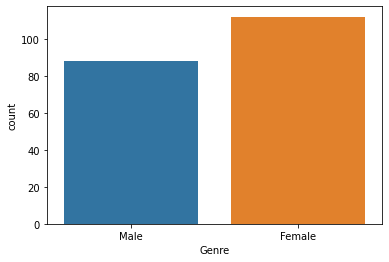

In [ ]:
sns.countplot(df['Genre'])

- Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


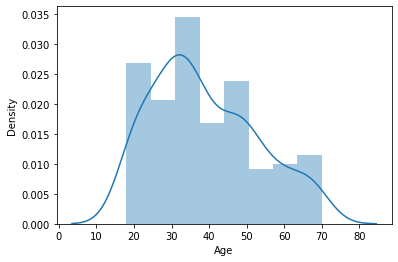

In [ ]:
sns.distplot(df['Age'])

- Annual Income

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


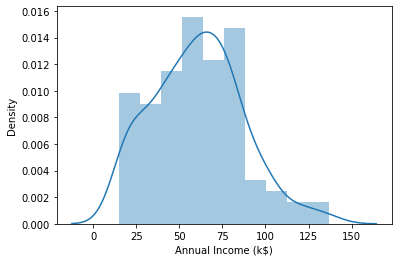

In [ ]:
sns.distplot(df['Annual Income (k$)'])

- Spending Score

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


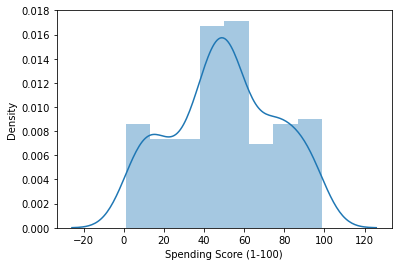

In [ ]:
sns.distplot(df['Spending Score (1-100)'])

- Bivariate Analysis

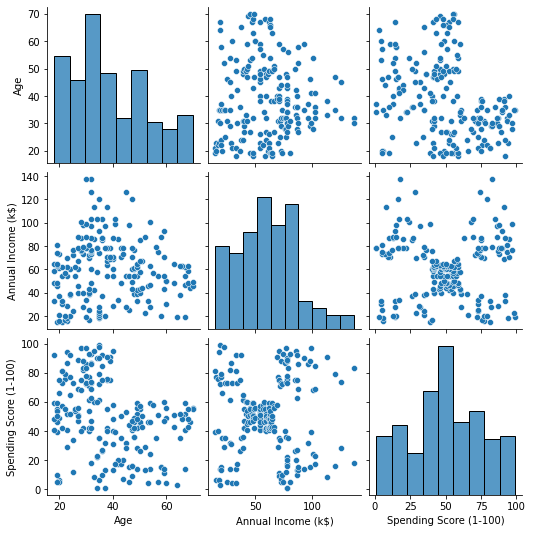

In [ ]:
sns.pairplot(df[[ 'Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])

Observations:

- Most of the customers are in the 20-40 age group.
- Spending score is high for the customers in the age group of 20-40.
- Spending score is high for customers with very low and very high income.

#### Heatmap

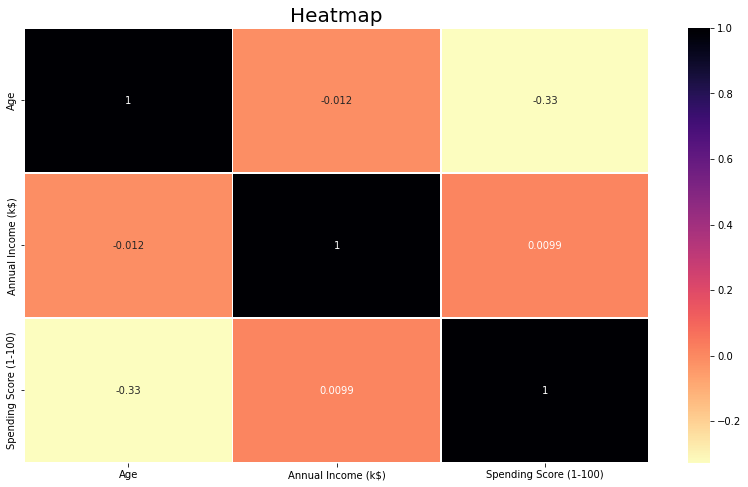

In [ ]:
plt.rcParams['figure.figsize'] = (14, 8)
sns.heatmap(df[[ 'Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].corr(), cmap = 'magma_r', annot = True, linewidths=.5)
plt.title('Heatmap', fontsize = 20)
plt.show()

#### Gender vs Spending Score

Text(1.6749999999999972, 0.5, 'Spending Score (1-100)')

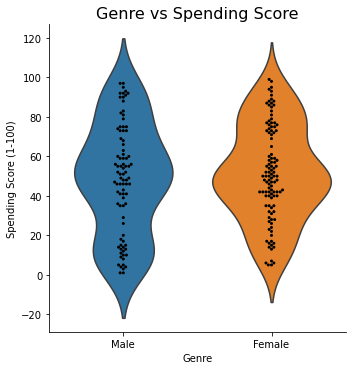

In [ ]:
plt.rcParams['figure.figsize'] = (16, 7)
g = sns.catplot(x="Genre", y="Spending Score (1-100)", kind="violin", inner=None, data=df)
sns.swarmplot(x="Genre", y="Spending Score (1-100)", color="k", size=3, data=df, ax=g.ax);
plt.title('Genre vs Spending Score', fontsize = 16)
plt.xlabel('Genre')
plt.ylabel('Spending Score (1-100)')

#### Gender vs Annual Income

Text(3.549999999999997, 0.5, 'Annual Income (k$)')

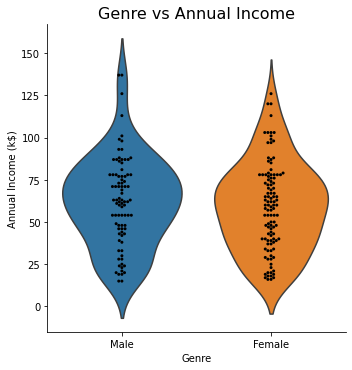

In [ ]:
plt.rcParams['figure.figsize'] = (16, 7)
g = sns.catplot(x="Genre", y="Annual Income (k$)", kind="violin", inner=None, data=df)
sns.swarmplot(x="Genre", y="Annual Income (k$)", color="k", size=3, data=df, ax=g.ax);
plt.title('Genre vs Annual Income', fontsize = 16)
plt.xlabel('Genre')
plt.ylabel('Annual Income (k$)')

Gender vs Age

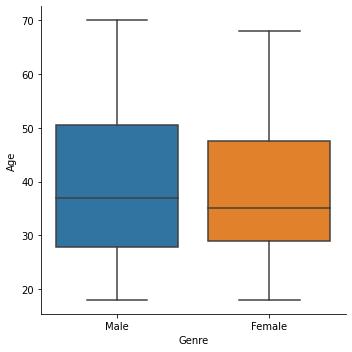

In [ ]:
sns.catplot(x="Genre", y="Age", kind="box", data=df);

K-Means Clustering
- k-means clustering based on annual income
- Elbow method to find the optimal number of Clusters

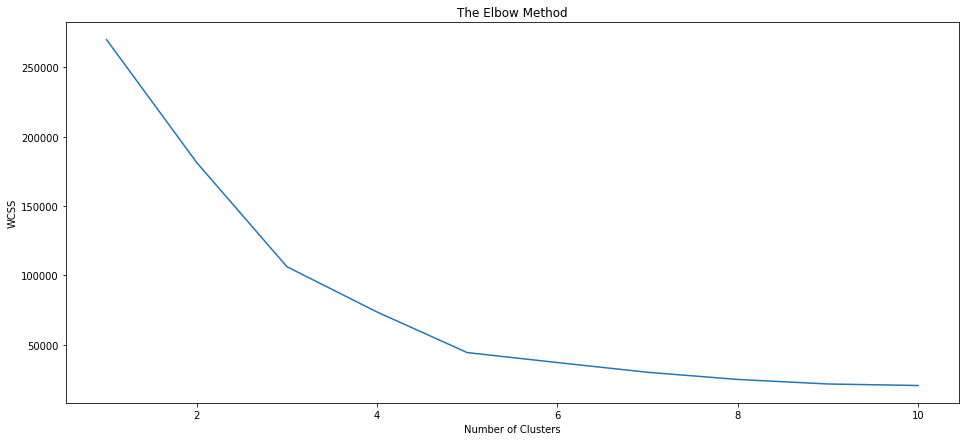

In [ ]:
data=df.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss=[] # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_) #inertia_ = to find the wcss value

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

- From the above figure, we can see that last most significant slope occurs at k = 5 , hence we will have 5 clusters in this case.

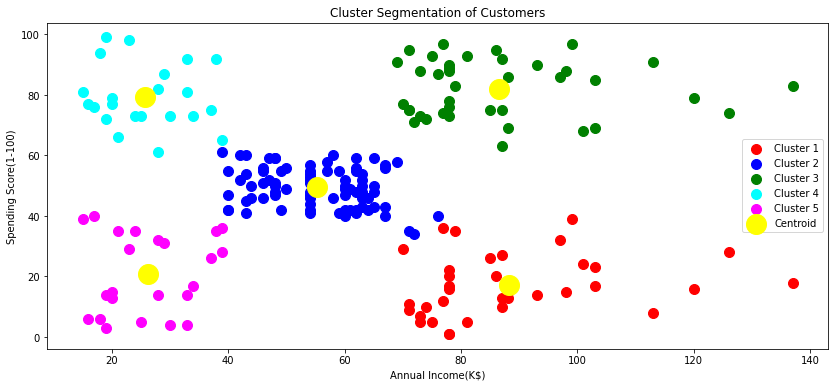

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

#plotting the the clusters
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
ax.scatter(data[y_kmeans==4,0],data[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

- k-means clustering based on Age

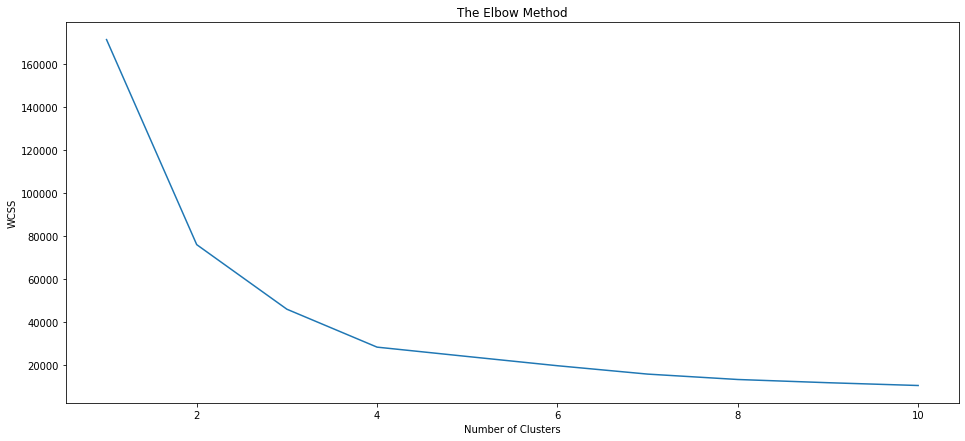

In [ ]:
data = df.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss=[]  # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # inertia_ = to find the wcss value

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above figure, we can see that last most significant slope occurs at k = 4 , hence we will have 4 clusters in this case.

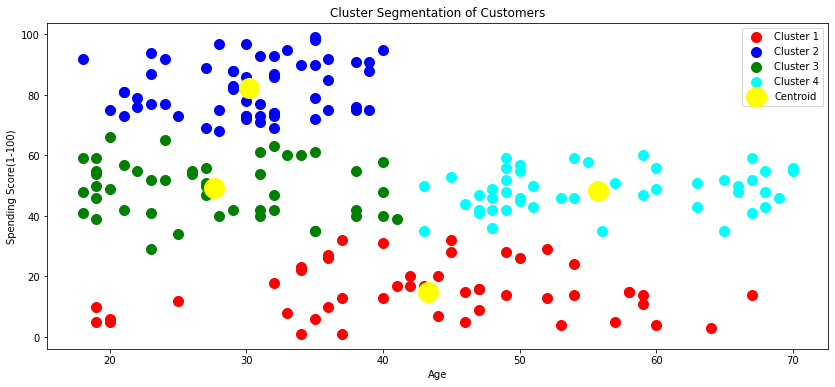

In [ ]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

#Plotting the clusters
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

Conclusion:

Using on the k-means clustering we have managed to form different clusters based on different features. Mall management can target the clusters with average spending score to increase their profit and should also maintain good relationship with premium customers with high spending score.They should also work on coming up with new innovative ideas to upgrade the customers with low spending score.